<a href="https://colab.research.google.com/github/nanmaharaj/FMML_Project_and_Labs/blob/main/Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

FMML Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=85efab7991fc22cce752211e6cc47205d1c7289f6c635a4fc8e2baf2569402fa
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
fr2

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
#print(eng1)
#print(eng2)
#print(fr1)
#print(fr2)

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  # print(combined)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  # print(zipped_sorted)
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

Counter({('e',): 3940, ('a',): 2939, ('t',): 2529, ('i',): 2430, ('s',): 2247, ('n',): 2128, ('r',): 2083, ('o',): 2083, ('h',): 1445, ('l',): 1388, ('d',): 1145, ('f',): 1078, ('c',): 1009, ('g',): 950, ('m',): 823, ('u',): 803, ('p',): 667, ('b',): 446, ('y',): 424, ('w',): 386, ('v',): 373, ('k',): 231, ('x',): 81, ('z',): 32, ('j',): 22, ('q',): 14})


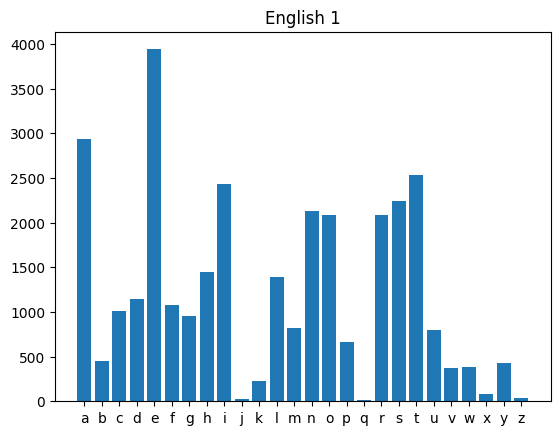

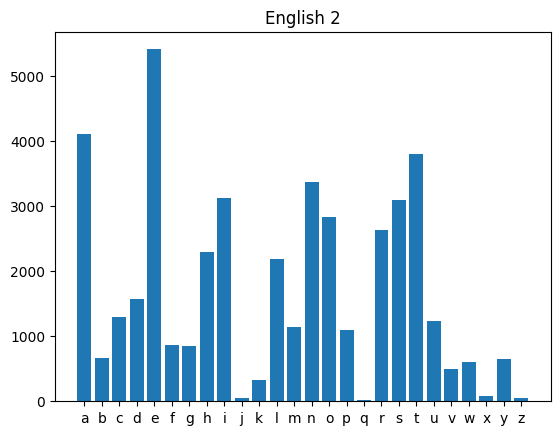

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
print(unigram_eng1)
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

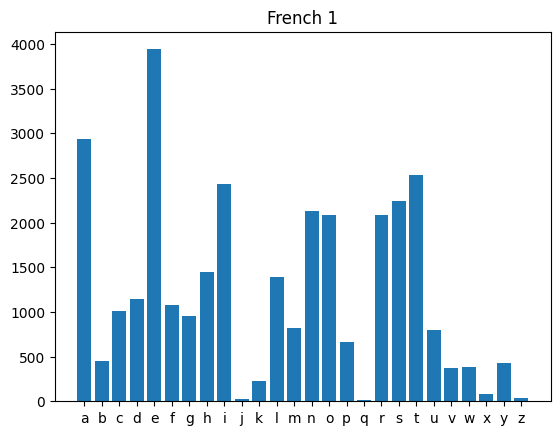

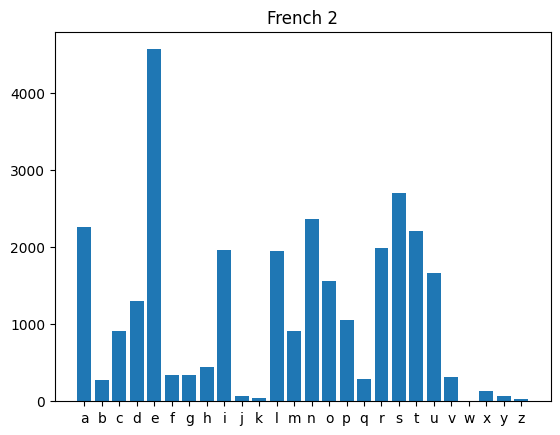

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

Counter({('t', 'h'): 842, ('h', 'e'): 697, ('e', 's'): 665, ('i', 'n'): 594, ('a', 'n'): 538, ('e', 'r'): 478, ('r', 'e'): 454, ('r', 'a'): 441, ('a', 'l'): 404, ('n', 'd'): 393, ('s', 't'): 370, ('o', 'n'): 367, ('e', 'a'): 348, ('a', 't'): 345, ('n', 'g'): 331, ('e', 'n'): 324, ('t', 'i'): 323, ('a', 'r'): 321, ('i', 'r'): 316, ('n', 't'): 309, ('t', 'e'): 292, ('f', 'e'): 289, ('g', 'i'): 281, ('e', 'd'): 278, ('l', 'e'): 269, ('i', 't'): 267, ('f', 'f'): 264, ('a', 'f'): 261, ('o', 'r'): 259, ('t', 'o'): 248, ('m', 'a'): 247, ('s', 'a'): 243, ('h', 'a'): 241, ('e', 'c'): 240, ('r', 'o'): 237, ('s', 'e'): 235, ('a', 's'): 231, ('v', 'e'): 228, ('s', 'i'): 215, ('i', 's'): 213, ('o', 'f'): 197, ('n', 'e'): 194, ('o', 'u'): 189, ('l', 'a'): 184, ('t', 's'): 179, ('s', 'o'): 175, ('c', 'a'): 173, ('e', 't'): 172, ('c', 'o'): 171, ('n', 'a'): 168, ('e', 'g'): 166, ('i', 'c'): 164, ('r', 'i'): 162, ('l', 'i'): 162, ('i', 'o'): 161, ('e', 'l'): 159, ('d', 'i'): 159, ('o', 'm'): 159, ('l',

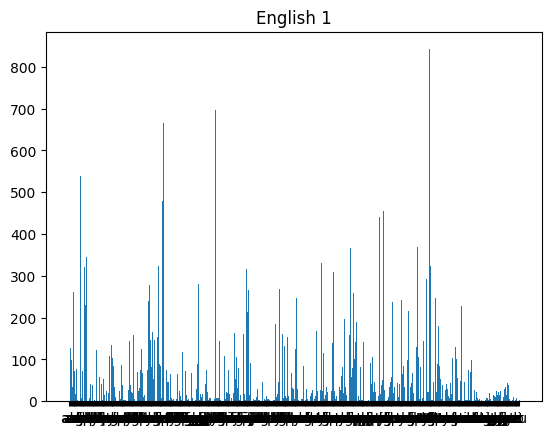

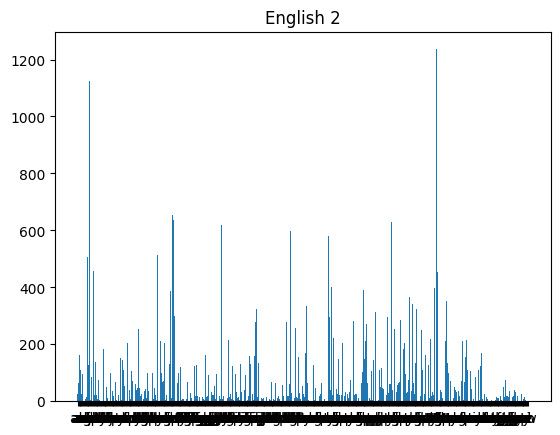

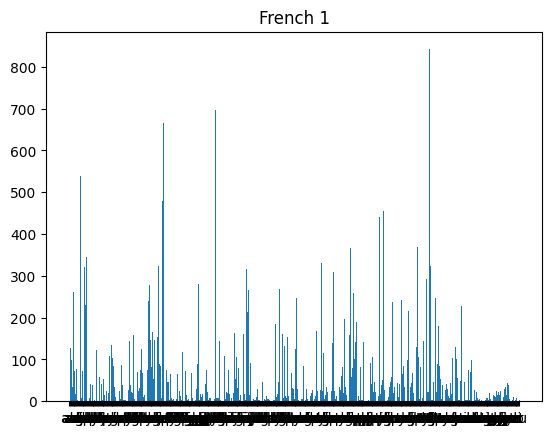

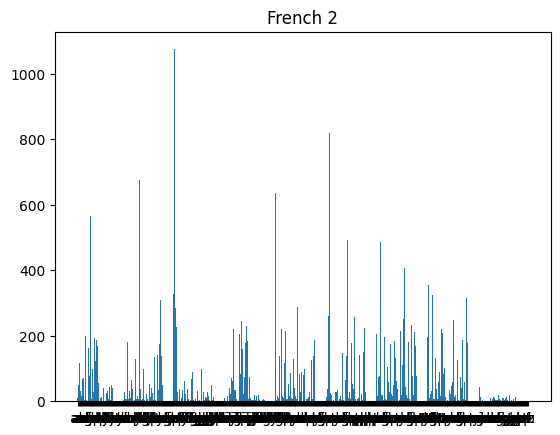

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
print(bigram_eng1)
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

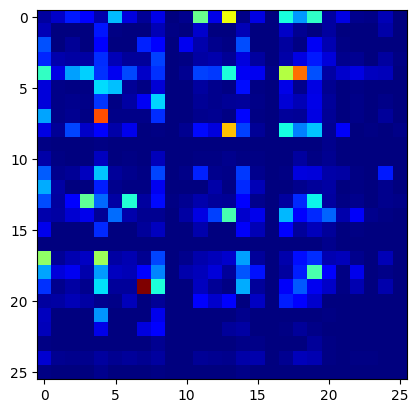

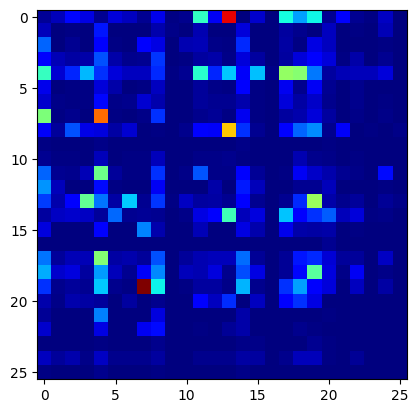

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

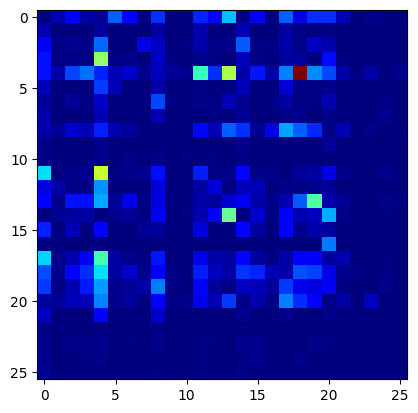

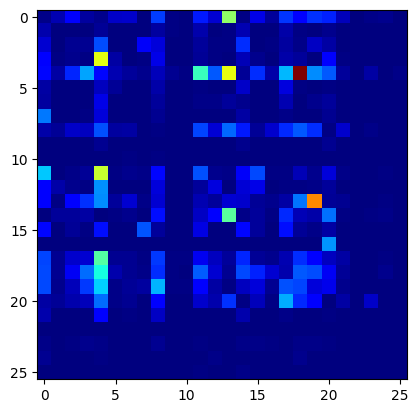

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1236.0
('a', 'n') : 1123.0
('h', 'e') : 981.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 653.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

In [ ]:
#1) Trying with different languages:
#German And Spanish

topic1 = 'Plane'
topic2 = 'Train'

wikipedia.set_lang('eo')

ger1 = wikipedia.page(topic1).content
ger2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

spa1 = wikipedia.page(topic1).content
spa2 = wikipedia.page(topic2).content


#print(ger1)
#print(ger2)
#print(spa1)
#print(spa2)


In [ ]:
ger1=cleanup(ger1)
ger2=cleanup(ger2)
spa1=cleanup(spa1)
spa2=cleanup(spa2)

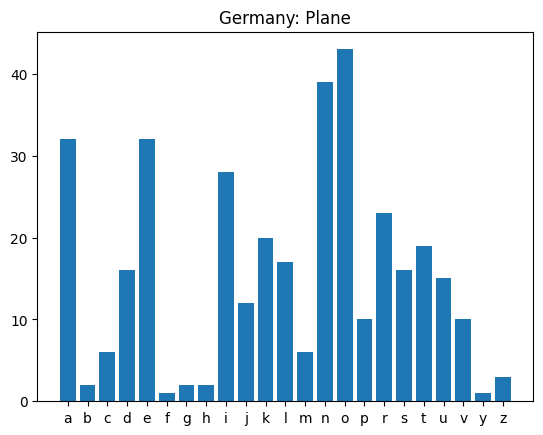

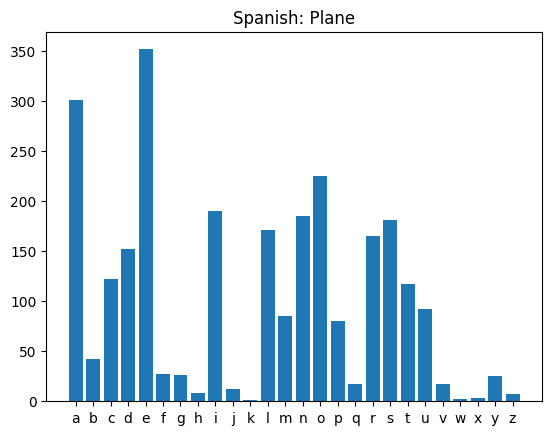

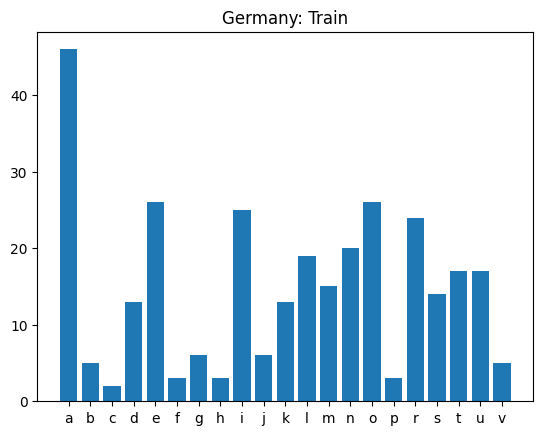

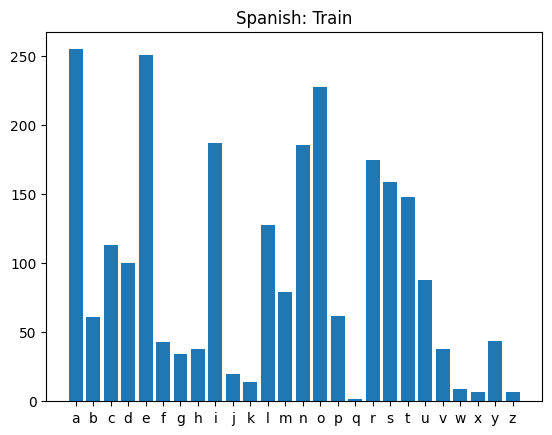

In [ ]:
uni_ger1 = Counter(ngrams(ger1,1))
plothistogram(uni_ger1)
plt.title('Germany: Plane')
plt.show()

uni_spa1 = Counter(ngrams(spa1,1))
plothistogram(uni_spa1)
plt.title('Spanish: Plane')
plt.show()

uni_ger2 = Counter(ngrams(ger2,1))
plothistogram(uni_ger2)
plt.title('Germany: Train')
plt.show()

uni_spa2 = Counter(ngrams(spa2,1))
plothistogram(uni_spa2)
plt.title('Spanish: Train')
plt.show()

Counter({('e', 'n'): 13, ('u', 'n'): 9, ('n', 't'): 9, ('o', 'r'): 9, ('a', 's'): 8, ('p', 'l'): 7, ('r', 'i'): 7, ('d', 'e'): 7, ('l', 'a'): 7, ('c', 'i'): 6, ('n', 'o'): 6, ('d', 'o'): 6, ('t', 'e'): 6, ('k', 'a'): 6, ('k', 'u'): 6, ('r', 'o'): 5, ('n', 'd'): 5, ('o', 'j'): 5, ('a', 'j'): 5, ('e', 'k'): 5, ('i', 'o'): 4, ('v', 'i'): 4, ('a', 'n'): 4, ('t', 'o'): 4, ('o', 'p'): 4, ('i', 'l'): 4, ('o', 'k'): 4, ('a', 'o'): 4, ('i', 'e'): 4, ('a', 'r'): 4, ('e', 's'): 3, ('s', 't'): 3, ('t', 'a'): 3, ('o', 'e'): 3, ('t', 'r'): 3, ('r', 'd'): 3, ('o', 'n'): 3, ('l', 'o'): 3, ('j', 'n'): 3, ('k', 'c'): 3, ('i', 'd'): 3, ('s', 'u'): 3, ('n', 'k'): 3, ('l', 'n'): 2, ('n', 'e'): 2, ('m', 'u'): 2, ('n', 'i'): 2, ('i', 'c'): 2, ('i', 'p'): 2, ('p', 'o'): 2, ('o', 't'): 2, ('o', 'v'): 2, ('a', 'e'): 2, ('i', 's'): 2, ('l', 'z'): 2, ('z', 'e'): 2, ('s', 'e'): 2, ('s', 'k'): 2, ('o', 'm'): 2, ('m', 'e'): 2, ('n', 'n'): 2, ('n', 's'): 2, ('a', 'v'): 2, ('k', 'o'): 2, ('r', 't'): 2, ('t', 'k'): 2, 

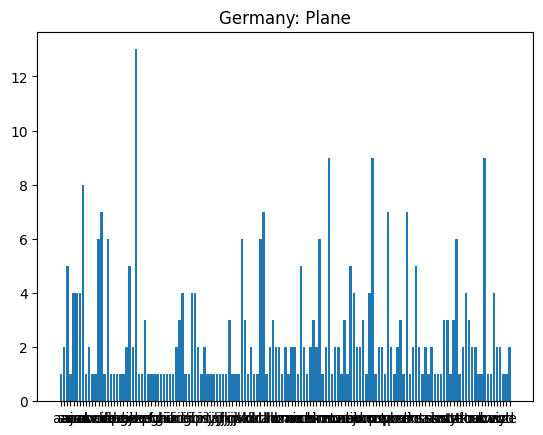

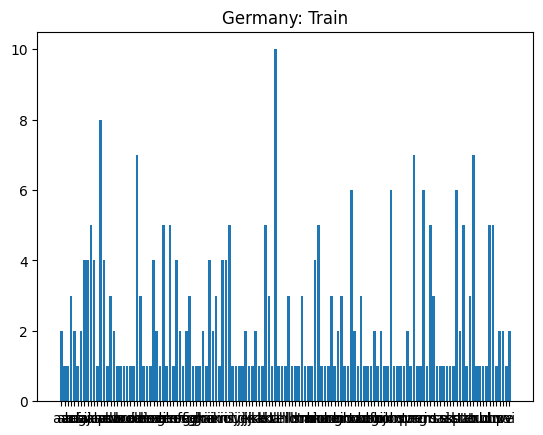

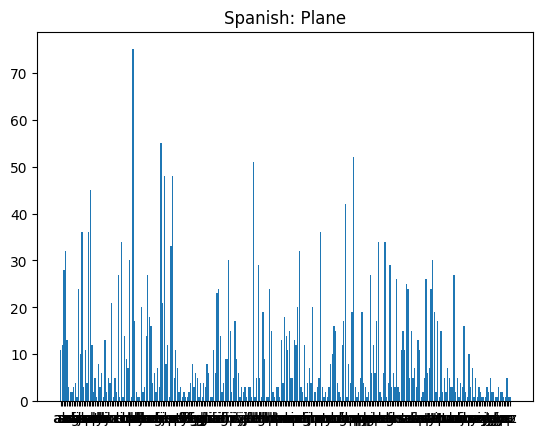

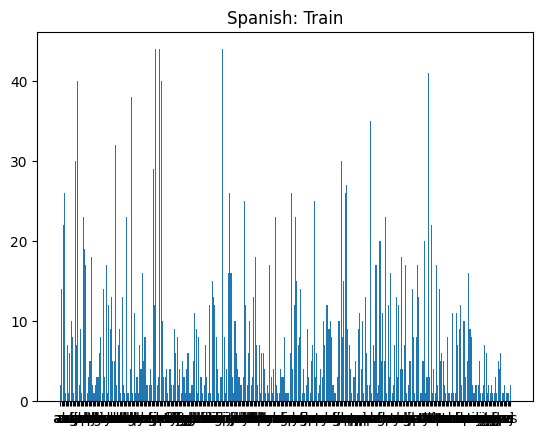

In [ ]:
bigram_ger1 = Counter(ngrams(ger1,2)) # bigrams
print(bigram_ger1)
plothistogram(bigram_ger1)
plt.title('Germany: Plane')
plt.show()

bigram_ger2 = Counter(ngrams(ger2,2))
plothistogram(bigram_ger2)
plt.title('Germany: Train')
plt.show()

bigram_spa1 = Counter(ngrams(spa1,2))
plothistogram(bigram_spa1)
plt.title('Spanish: Plane')
plt.show()

bigram_spa2 = Counter(ngrams(spa2,2))
plothistogram(bigram_spa2)
plt.title('Spanish: Train')
plt.show()

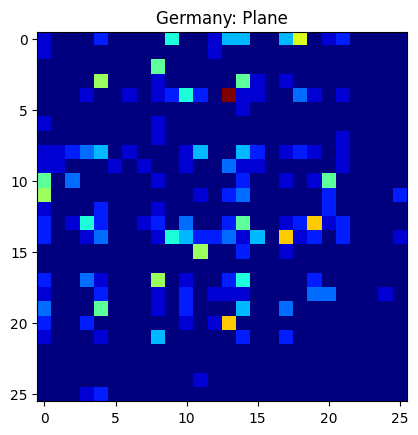

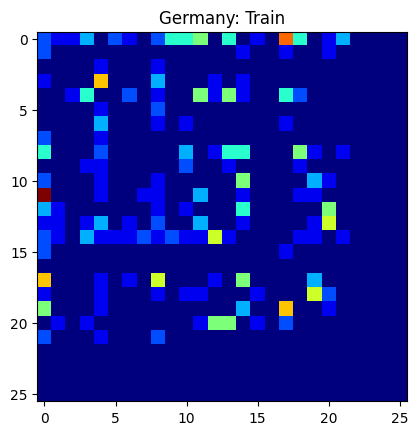

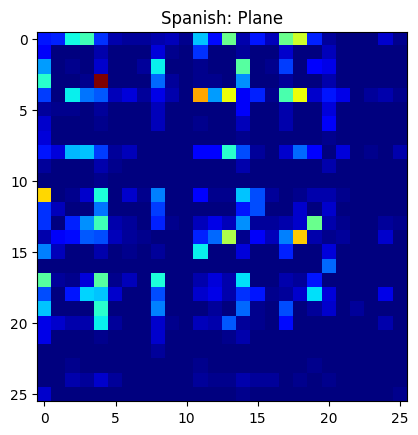

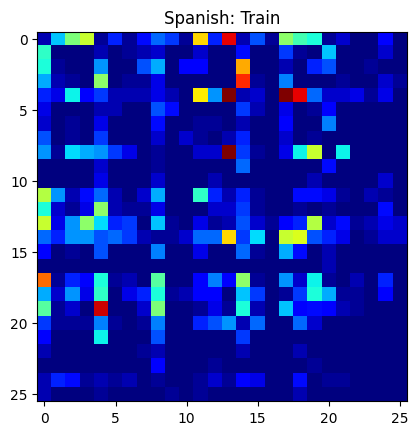

In [ ]:
biger1 = plotbihistogram(bigram_ger1)
plt.title('Germany: Plane')
plt.show()
biger2 = plotbihistogram(bigram_ger2)
plt.title('Germany: Train')
plt.show()
bispa1 = plotbihistogram(bigram_spa1)
plt.title('Spanish: Plane')
plt.show()
bispa2 = plotbihistogram(bigram_spa2)
plt.title('Spanish: Train')
plt.show()

Counter({('t', 'h', 'e'): 596, ('a', 'n', 'd'): 274, ('i', 'r', 'a'): 233, ('r', 'a', 'f'): 229, ('g', 'i', 'r'): 227, ('a', 'f', 'f'): 225, ('f', 'f', 'e'): 208, ('i', 'n', 'g'): 205, ('i', 'o', 'n'): 137, ('e', 's', 't'): 125, ('m', 'a', 'l'): 121, ('t', 'i', 'o'): 119, ('f', 'e', 's'): 118, ('s', 't', 'h'): 105, ('h', 'e', 'r'): 103, ('n', 't', 'h'): 102, ('a', 'r', 'e'): 100, ('i', 'n', 't'): 94, ('a', 't', 'e'): 93, ('o', 't', 'h'): 91, ('e', 'n', 't'): 90, ('a', 'l', 'e'): 89, ('a', 't', 'i'): 87, ('e', 'g', 'i'): 86, ('e', 's', 'a'): 86, ('t', 'h', 'a'): 85, ('e', 'r', 'e'): 82, ('s', 'a', 'n'): 81, ('l', 'e', 's'): 80, ('d', 't', 'h'): 80, ('r', 'e', 'a'): 78, ('e', 't', 'h'): 77, ('n', 'g', 't'): 75, ('s', 'i', 'n'): 74, ('h', 'e', 's'): 72, ('e', 'a', 'r'): 71, ('a', 'l', 'l'): 70, ('r', 'e', 's'): 70, ('t', 'e', 'r'): 69, ('i', 't', 's'): 68, ('f', 'o', 'r'): 67, ('i', 'e', 's'): 65, ('e', 'a', 'n'): 65, ('i', 't', 'h'): 64, ('h', 'e', 'g'): 62, ('o', 'n', 't'): 62, ('v', 'e

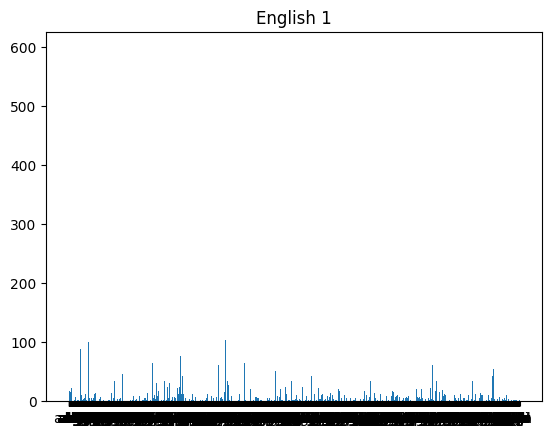

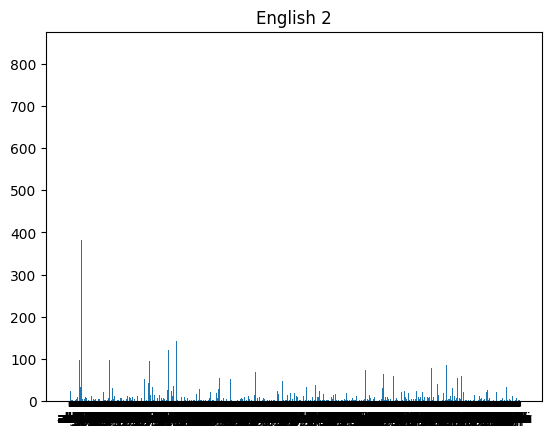

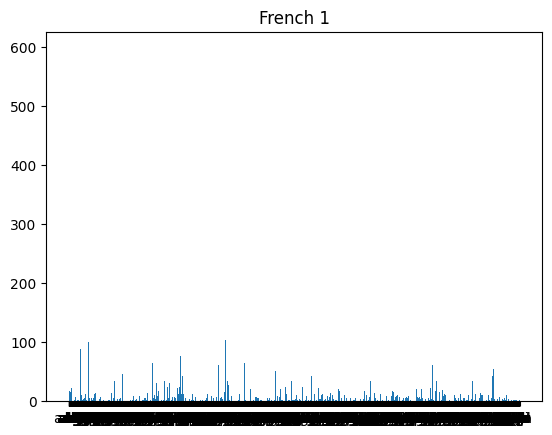

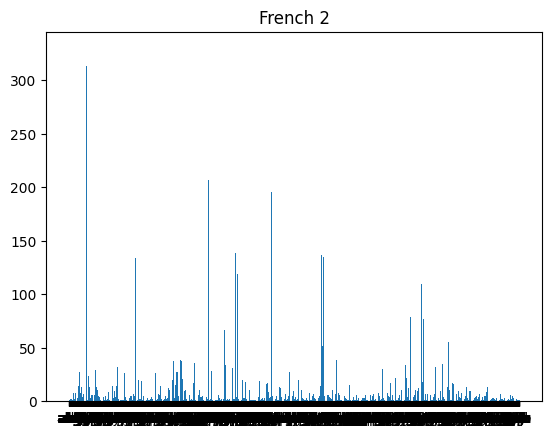

In [ ]:
#3 ) trigram (takes large amount of time to execute)

trigram_eng1 = Counter(ngrams(eng1,3)) # bigrams
print(trigram_eng1)
plothistogram(trigram_eng1)
plt.title('English 1')
plt.show()

trigram_eng2 = Counter(ngrams(eng2,3))
plothistogram(trigram_eng2)
plt.title('English 2')
plt.show()

trigram_fr1 = Counter(ngrams(fr1,3))
plothistogram(trigram_eng1)
plt.title('French 1')
plt.show()

trigram_fr2 = Counter(ngrams(fr2,3))
plothistogram(trigram_fr2)
plt.title('French 2')
plt.show()

Counter({('t', 'h'): 1686, ('h', 'e'): 1301, ('a', 'n'): 1230, ('e', 'r'): 1095, ('a', 'r'): 898, ('s', 't'): 849, ('r', 'e'): 829, ('e', 's'): 809, ('e', 't'): 800, ('l', 'a'): 770, ('i', 'n'): 764, ('n', 'e'): 763, ('o', 'n'): 684, ('t', 'e'): 653, ('t', 'i'): 616, ('a', 't'): 614, ('i', 't'): 607, ('a', 's'): 595, ('e', 'n'): 554, ('e', 'd'): 550, ('n', 't'): 550, ('n', 'd'): 544, ('p', 'l'): 540, ('t', 's'): 527, ('e', 'a'): 522, ('r', 'o'): 518, ('o', 'r'): 500, ('h', 'a'): 466, ('t', 'o'): 462, ('a', 'l'): 459, ('s', 'a'): 452, ('t', 'a'): 450, ('o', 'f'): 435, ('i', 's'): 422, ('s', 'o'): 408, ('m', 'a'): 394, ('s', 'i'): 370, ('v', 'e'): 366, ('s', 'e'): 360, ('d', 'e'): 354, ('r', 'a'): 352, ('s', 's'): 341, ('r', 'i'): 325, ('m', 'e'): 323, ('d', 'i'): 321, ('n', 'g'): 320, ('e', 'c'): 311, ('n', 'a'): 308, ('n', 'o'): 298, ('r', 't'): 293, ('e', 'm'): 292, ('c', 'e'): 285, ('r', 's'): 282, ('i', 'o'): 280, ('l', 'e'): 277, ('i', 'c'): 275, ('o', 't'): 275, ('e', 'l'): 275, (

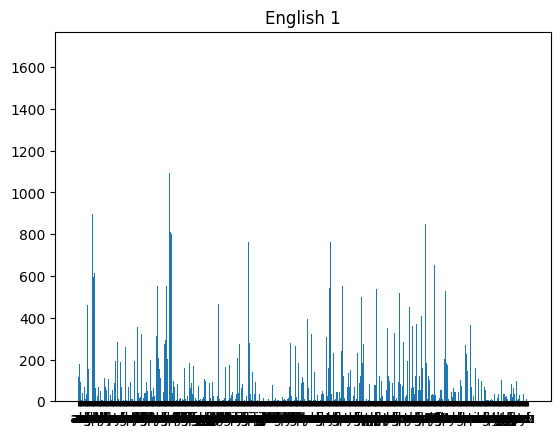

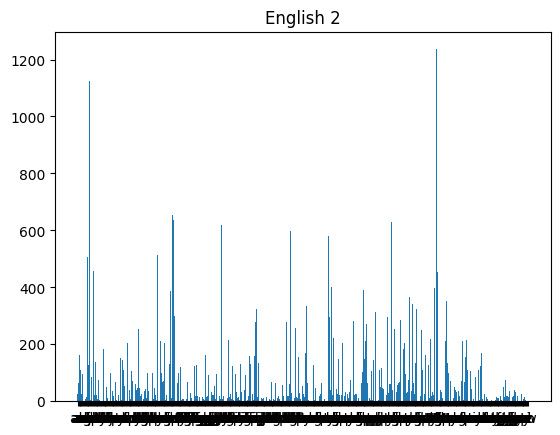

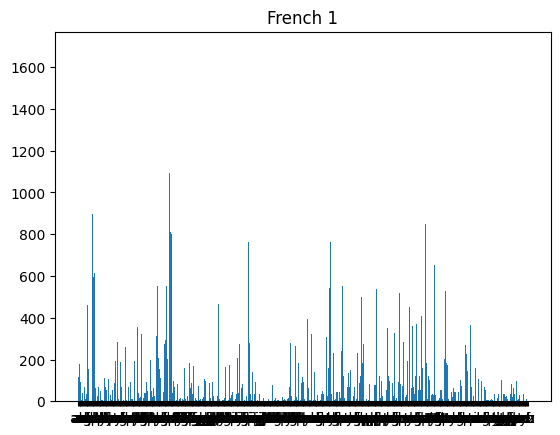

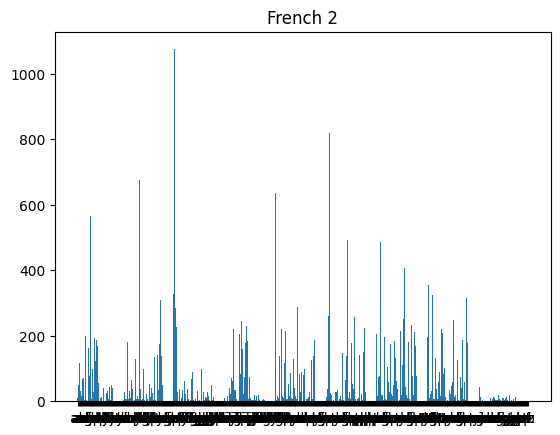

In [32]:
# words of different topics

topic1 = 'Plane'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content



eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)


bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
print(bigram_eng1)
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#MNIST is a dataset containing 28x28 pixel grayscale images of handwritten digits (0 through 9).
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
#This line loads the MNIST dataset, separating it into training and testing sets.
#train_X contains the training images, train_y contains their corresponding labels (digits) and similarly

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [43]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

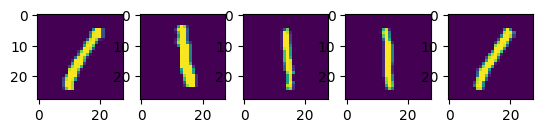

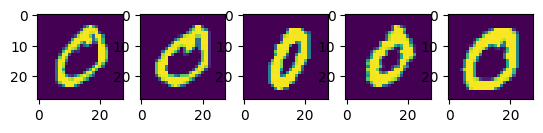

In [44]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  #sets up a subplot for displaying multiple images in a single row.
  #It indicates that there will be one row and five columns for the subplots, and ii+1 specifies the current subplot being set up within the loop.
  plt.imshow(no1[ii,:,:])
  #displays the current digit "1" image from the no1 subset in the subplot.
plt.show()
#displays the plot that contains the first five images of digit "1" in a single row.
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [45]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

print(sum1)
print(sum0)
#calculate the number of non-zero pixels for each image in the no1 and no0 subsets of the MNIST dataset

print(sum1.shape)


[96 93 68 ... 76 96 74]
[176 198 183 ... 174 204 197]
(6742,)


Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

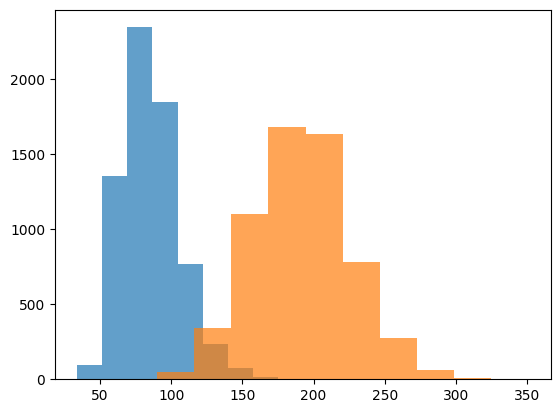

In [46]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

#x-axis: sum of pixels, y-axis: how many images with this sum

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [47]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

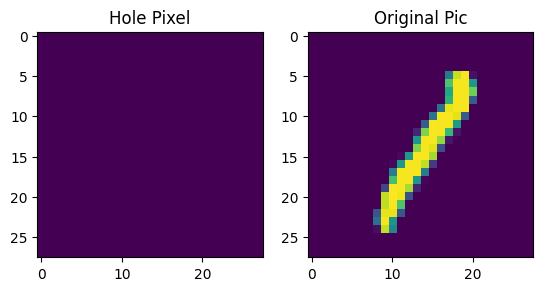

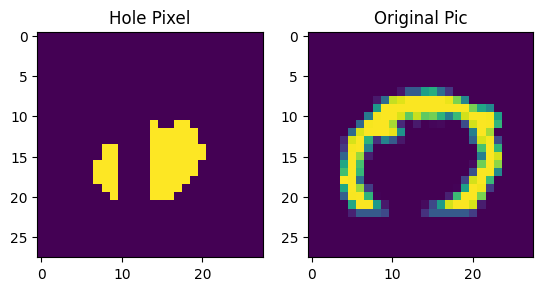

In [48]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.title('Hole Pixel')
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.title('Original Pic')
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

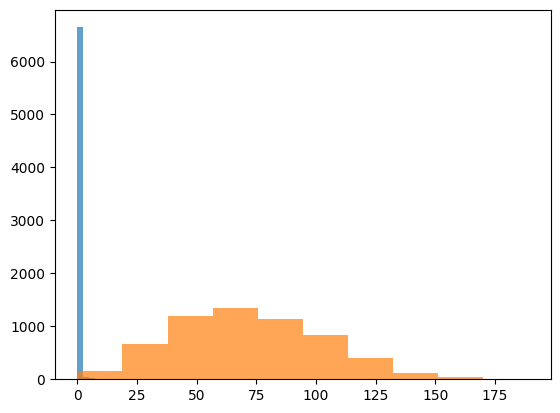

In [49]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [50]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

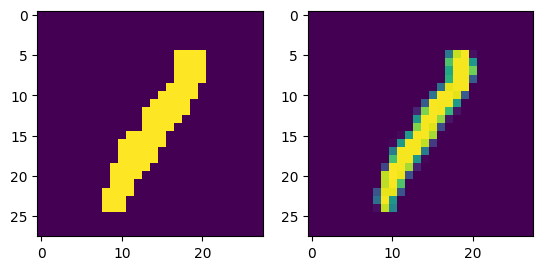

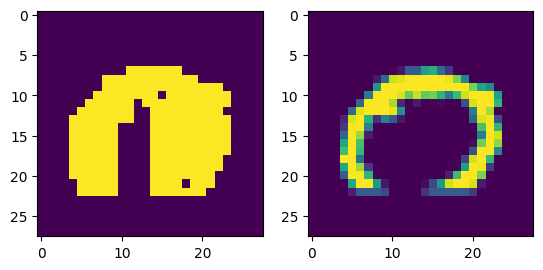

In [51]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

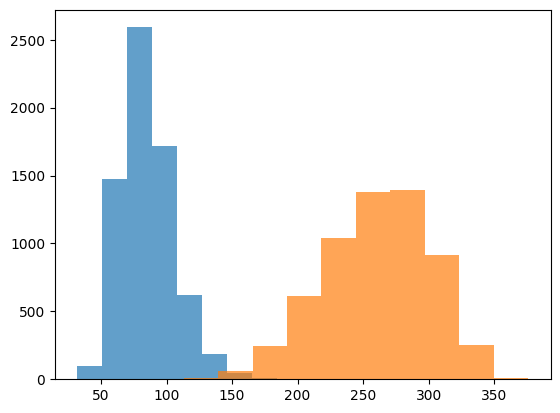

In [52]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [53]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

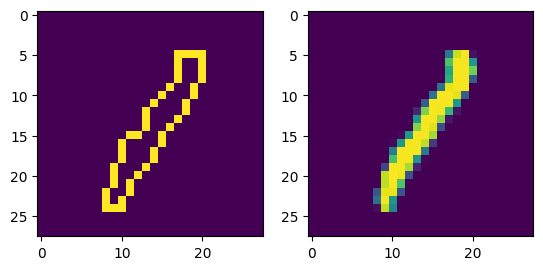

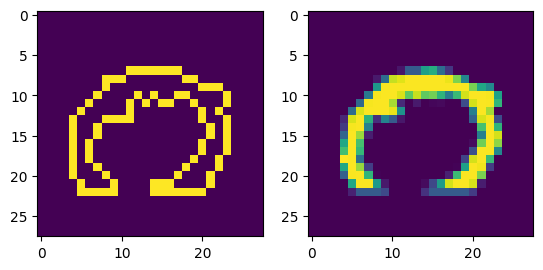

In [54]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

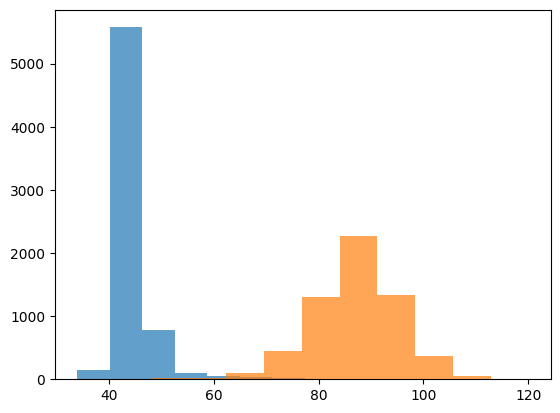

In [55]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

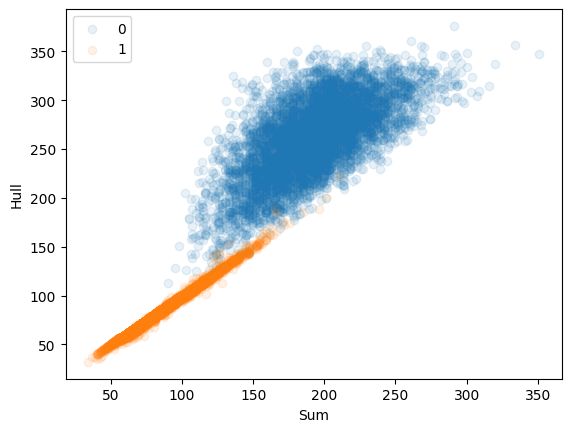

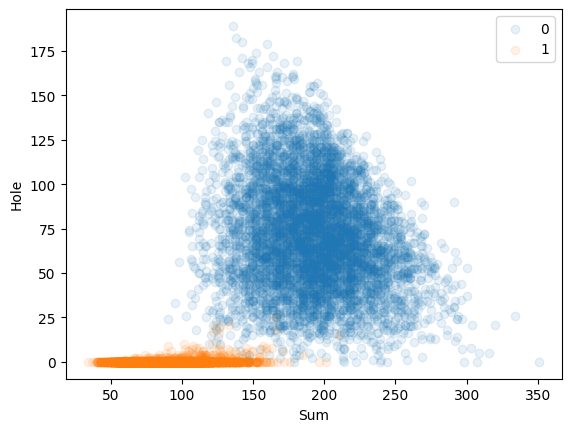

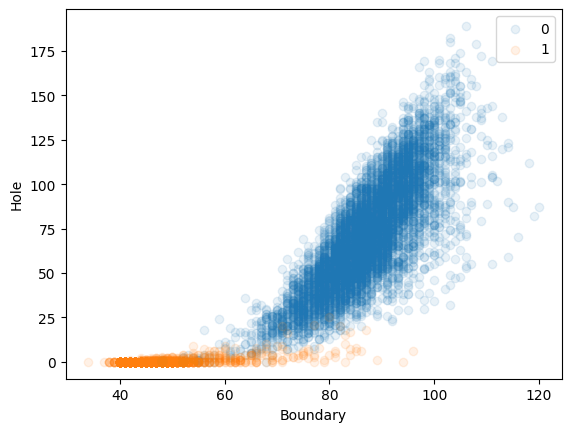

In [56]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [57]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

**Answers:**

1) The hole,sun and boundary features are the best combination for the classes '0' and '1', as they can be classified clearly.

2) We know that we cannot draw more than 3 axes, so to visualise 4 or more dimesnions we make changes in the depth, hue, shape and size of the plots in a scatter plot. Each characteristic change corresponds to a dimension.

3) Other features can be: counting the total no. of loops in the figure, no. of lines,symmetry, angle of lines etc.

4)On executing below code, we observe that no pair of the above features are able to clearly distinguish numbers '5' and '6' . We may have to use featues like, no. of loops and no. of lines.

5)If we take more than 2 classes at a time, the number of features used to clearly distinguish them will also increase.

In [ ]:
no1 = train_X[train_y==5,:,:]
no0 = train_X[train_y==6,:,:]

**Quiz notes:**



1.The process of converting data to something a computer can understand is called Data Preprocessing.
2.9. ["","","","","","","","",""] (word-wise)
3.10. (0-9 numbers)
4.Non-numerical features(categorical and text data) are often encoded into numerals before being ingested into machine learning models.
5.Text corpus is a collection of text sources


